In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [15]:
data = pd.read_csv('data.csv')
data_X = data.iloc[:,0].values
data_y = data.iloc[:,1].values

data.head()

,one,two
0,1.0,1.523970
1,2.0,4.174553
2,3.0,3.907327
3,4.0,4.023301
4,5.0,6.394509


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [17]:
batch_sizes=[2**x for x in range(6)]
middle_layer_sizes=[x for x in range(4,40,4)]

batch_size: 1, middle_layer_size: 4, mse: [1.3297525644302368, 1.3297525644302368]


TypeError: '<' not supported between instances of 'float' and 'list'

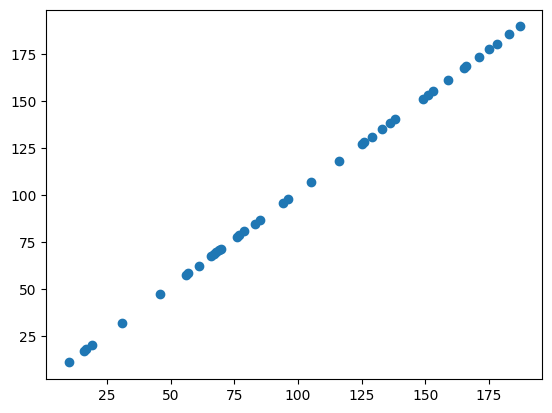

In [18]:
prediction=0
parameters=[]
lowest_mse=1000000
best_parameters=None
for batch_size in batch_sizes:
    for size in middle_layer_sizes:
        model = model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='linear', input_shape=(1,)),
        tf.keras.layers.Dense(size, activation='linear'),
        tf.keras.layers.Dense(1)
        ])
        model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics='mse')
        model.fit(X_train, y_train, epochs=30, batch_size=size,verbose=0)
        mse = model.evaluate(X_test, y_test, verbose=0)
        if mse[0] < lowest_mse:
            lowest_mse = mse[0]
            best_parameters = (batch_size,size,mse)
        parameters.append((batch_size,size,mse))
        print(f"batch_size: {batch_size}, middle_layer_size: {size}, mse: {mse}")
        plt.scatter(X_test, model.predict(X_test,verbose=0), label=f'{prediction}')
        prediction+=1
plt.scatter(X_test, y_test, label='ground truth')
plt.legend()
plt.show()
print(f"Best parameters are {best_parameters}")

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='linear', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='linear'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

model.fit(X_train, y_train, epochs=30, batch_size=1)


Epoch 1/30
160/160 [==============================] - 1s 1ms/step - loss: 816.6088
Epoch 2/30
160/160 [==============================] - 0s 976us/step - loss: 1.8192
Epoch 3/30
160/160 [==============================] - 0s 983us/step - loss: 1.8989
Epoch 4/30
160/160 [==============================] - 0s 976us/step - loss: 1.9159
Epoch 5/30
160/160 [==============================] - 0s 1ms/step - loss: 1.8279
Epoch 6/30
160/160 [==============================] - 0s 1ms/step - loss: 2.0357
Epoch 7/30
160/160 [==============================] - 0s 1ms/step - loss: 2.0514
Epoch 8/30
160/160 [==============================] - 0s 1ms/step - loss: 1.8491
Epoch 9/30
160/160 [==============================] - 0s 994us/step - loss: 1.9080
Epoch 10/30
160/160 [==============================] - 0s 989us/step - loss: 1.9846
Epoch 11/30
160/160 [==============================] - 0s 985us/step - loss: 1.7190
Epoch 12/30
160/160 [==============================] - 0s 977us/step - loss: 1.8414
Epoch 13/

In [9]:
mse = model.evaluate(X_test, y_test)
print(f'Test {mse=}')

2/2 [==============================] - 0s 2ms/step - loss: 1.6732
Test mse=1.673240303993225
